# $\theta_{W}$ and Tajima's D

### Vegetative Propogation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tajimasD import tajimaD_W,waterson_theta

In [2]:
from pi_for_temperature_notebook import *
options = get_veg_prop_args()

In [3]:
def min_freq(data, minimum=0.01, freq1='freqPropReplicateA', freq2='freqPropReplicateB'):
    
    data = data.loc[data.temperature != 32]
    data = data.dropna(subset=[freq1,freq2])
    data = pd.concat([data.loc[data[freq1] >= minimum],data.loc[data[freq2] >= minimum]]).drop_duplicates()
    
    return data

From previous work, we will aggregate (averaging) data down to passage, species, and segment using a minimum frequency of 3% in either technical replicate and present in the other. 

In [11]:
#read in the data
data = pd.read_csv("variant-calls_vegprop-expt_2020-04-07_tables.csv",header=0,index_col=0)

#make sure each variant is at least present in both tech replicates
data_both_present = data.dropna(subset=['ADReplicateA','ADReplicateB'])

#make sure each variant present at 3% minimum frequency in either of the tech replicates
filtered_data = pd.concat([data_both_present.loc[data_both_present.freqPropReplicateA >= 0.03],
                           data_both_present.loc[data_both_present.freqPropReplicateB >= 0.03]]).drop_duplicates()

#generate a mean total coverage (between tech reps) for each variant
filtered_data['freqProp'] = filtered_data[['freqPropReplicateA','freqPropReplicateB']].mean(axis=1)

#generate a mean total coverage (between tech reps) for each variant
filtered_data['DP'] = filtered_data[['DPReplicateA','DPReplicateB']].mean(axis=1)

filtered_data['AD'] = filtered_data[['ADReplicateA','ADReplicateB']].mean(axis=1)

In [13]:
#aggregate the data, averaging collapsed columns
agg_data = average_groups(filtered_data,
                          ['chrom','pos','alt','passage','ref'])

#reset the index and restore index columns to data columns
agg_data.reset_index(inplace=True)

#make sure that the position column is datatype integer
agg_data['pos'] = agg_data.pos.astype(int)

#set frequency column name
options['frequency'] = 'freqPropMeanNoNA'

#set coverage column
options['coverage'] = 'DP'

pi_df = get_group_pis(agg_data,
                     options=options,
                     group_by=['chrom','passage'])

In [14]:
print("Chrom,Passage\t\tWaterson's Theta\tPi\t\tTajima's D")

for group in agg_data.groupby(by=['chrom','passage']):
  
    group_pi = float(pi_df.loc[pi_df.chrom == group[0][0]].loc[pi_df.passage == group[0][1]]['pi'])
    D,W = tajimaD_W(data=group[1],coverage='DP',pi=group_pi)
    
    #print(D)
    print("{}\t\t{:.3}\t\t{:.3}\t\t{:.3}".format(group[0],W,group_pi,D))

Chrom,Passage		Waterson's Theta	Pi		Tajima's D
('ACMV DNA-A', 1)		4.85		8.24		1.56
('ACMV DNA-A', 2)		10.6		23.4		2.96
('ACMV DNA-A', 3)		10.7		19.1		1.89
('ACMV DNA-A', 4)		16.9		44.1		4.0
('ACMV DNA-A', 5)		12.3		36.4		4.71
('ACMV DNA-A', 6)		15.1		43.6		4.72
('ACMV DNA-A', 7)		12.5		25.1		2.48
('ACMV DNA-B', 1)		6.47		12.4		2.13
('ACMV DNA-B', 2)		11.0		23.2		2.76
('ACMV DNA-B', 3)		10.1		23.6		3.27
('ACMV DNA-B', 4)		16.4		42.9		4.0
('ACMV DNA-B', 5)		8.21		26.9		5.34
('ACMV DNA-B', 6)		11.4		29.5		4.02
('ACMV DNA-B', 7)		4.03		8.91		2.7
('EACMCV DNA-A', 1)		7.32		14.2		2.26
('EACMCV DNA-A', 2)		11.4		17.8		1.42
('EACMCV DNA-A', 3)		15.5		34.0		2.99
('EACMCV DNA-A', 4)		18.0		38.4		2.84
('EACMCV DNA-A', 5)		12.9		28.7		2.97
('EACMCV DNA-A', 6)		17.2		42.2		3.66
('EACMCV DNA-A', 7)		21.3		64.6		5.15
('EACMCV DNA-B', 1)		6.74		9.93		1.14
('EACMCV DNA-B', 2)		15.2		23.1		1.35
('EACMCV DNA-B', 3)		14.8		25.9		1.92
('EACMCV DNA-B', 4)		21.1		39.0		2.21
('EACMCV DNA-B', 5)		20.1		35.3		1

In [16]:
#generate a dictionary to populate with data
measures = {}
measures['chrom'] = []
measures['passage'] = []
measures['min_freq'] = []
measures['pi'] = []
measures['W'] = []
measures['D'] = []

#set frequency column name
options['frequency'] = 'freqPropMeanNoNA'

#set coverage column
options['coverage'] = 'DP'

#this loop can take several minutes
#use:
#for i in range(0,41,5): 
#for a faster loop with lower resolution

for i in range(41):

    #make sure each variant present at 3% minimum frequency in either of the tech replicates
    filtered_data = pd.concat([data_both_present.loc[data_both_present.freqPropReplicateA >= i/1000],
                           data_both_present.loc[data_both_present.freqPropReplicateB >= i/1000]]).drop_duplicates()

    #generate a mean total coverage (between tech reps) for each variant
    filtered_data['freqProp'] = filtered_data[['freqPropReplicateA','freqPropReplicateB']].mean(axis=1)

    #generate a mean total coverage (between tech reps) for each variant
    filtered_data['DP'] = filtered_data[['DPReplicateA','DPReplicateB']].mean(axis=1)

    filtered_data['AD'] = filtered_data[['ADReplicateA','ADReplicateB']].mean(axis=1)

    #aggregate the data, averaging collapsed columns
    agg_data = average_groups(filtered_data,
                          ['chrom','pos','alt','passage','ref'])

    #reset the index and restore index columns to data columns
    agg_data.reset_index(inplace=True)

    #make sure that the position column is datatype integer
    agg_data['pos'] = agg_data.pos.astype(int)

  

    pi_df = get_group_pis(agg_data,
                     options=options,
                     group_by=['chrom','passage'])

    for group in agg_data.groupby(by=['chrom','passage']):
        
        measures['min_freq'].append(i/1000)
        measures['chrom'].append(group[0][0])
        measures['passage'].append(group[0][1])
        
        group_pi = float(pi_df.loc[pi_df.chrom == group[0][0]].loc[pi_df.passage == group[0][1]]['pi'])
        D,W = tajimaD_W(data=group[1],coverage='DP',pi=group_pi)
        
        measures['D'].append(D)
        measures['W'].append(W)
        measures['pi'].append(group_pi)

In [17]:
mdf = pd.DataFrame.from_dict(measures)

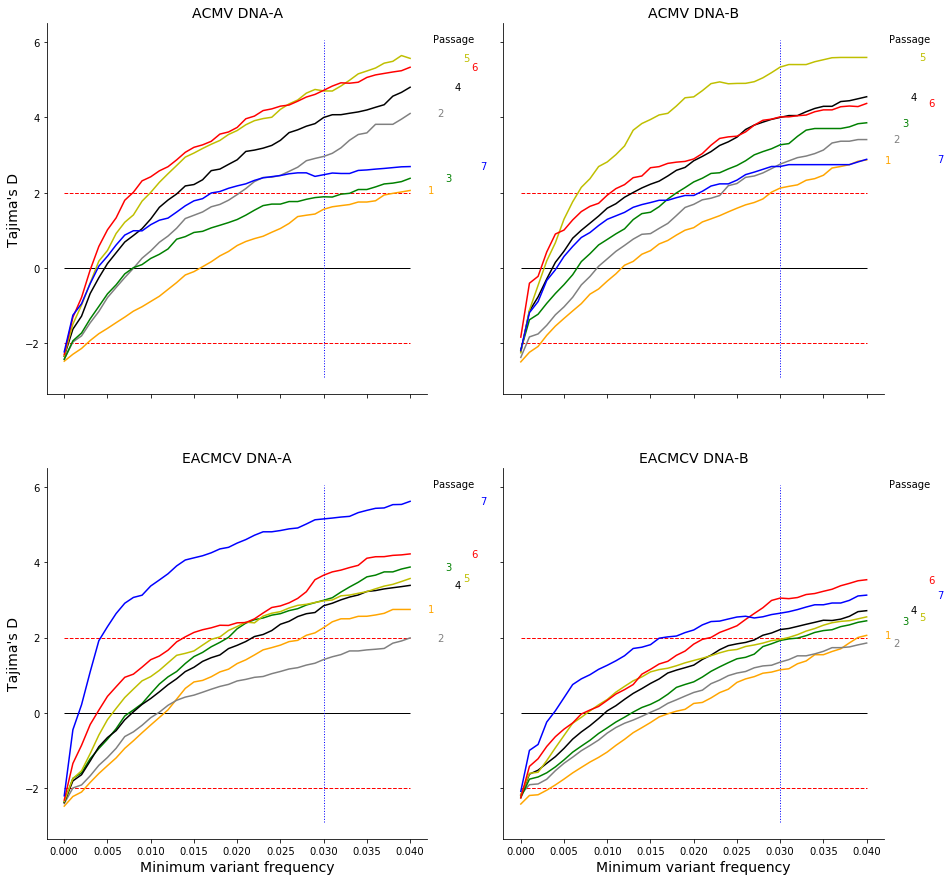

In [18]:
#create a plot area in <fig> with subplots in <axes>
#2,2 is the number of subplots horizontally,vertically (so 2X2)
#figsize is figure outer dimnsions in inches
#sharey and sharex are set to true to automatically set all subplots to the same scales and prints labels only on the outsides
fig,axes = plt.subplots(2,2,figsize=(15,15),sharey=True,sharex=True)

colors=['b','r','y','k','g','grey','orange']
#each subplot can be accessed by its coordinate in <axes>
#ax= instructs the plot function to send the output to a target subplot, rather than a new figure
#loop through the data for each passage, and plot a line for each segment in the appropritate subplot
for passage in mdf.passage.unique():
    
    c = colors.pop()
    mdf.loc[mdf.passage == passage].loc[mdf.chrom == 'ACMV DNA-A'].plot(y='D',x='min_freq',
                                                                        ax=axes[0,0],
                                                                        color=c,
                                                                        legend=False)
    mdf.loc[mdf.passage == passage].loc[mdf.chrom == 'ACMV DNA-B'].plot(y='D',x='min_freq',
                                                                        ax=axes[0,1],
                                                                        color=c,
                                                                        legend=False)
    mdf.loc[mdf.passage == passage].loc[mdf.chrom == 'EACMCV DNA-A'].plot(y='D',x='min_freq',
                                                                          ax=axes[1,0],
                                                                          color=c,
                                                                          legend=False)
    mdf.loc[mdf.passage == passage].loc[mdf.chrom == 'EACMCV DNA-B'].plot(y='D',x='min_freq',
                                                                          ax=axes[1,1],
                                                                          color=c,
                                                                          legend=False)
    #generate the text annotations for each passage
    axes[0,0].text(0.0411+passage/1000,
                   mdf.loc[mdf.passage == passage].loc[mdf.chrom == 'ACMV DNA-A'].loc[mdf.min_freq == 0.04]['D'],
                   s=passage,
                   verticalalignment='center',
                   color=c)
    axes[0,1].text(0.0411+passage/1000,
                   mdf.loc[mdf.passage == passage].loc[mdf.chrom == 'ACMV DNA-B'].loc[mdf.min_freq == 0.04]['D'],
                   s=passage,
                   verticalalignment='center',
                   color=c)
    axes[1,0].text(0.0411+passage/1000,
                   mdf.loc[mdf.passage == passage].loc[mdf.chrom == 'EACMCV DNA-A'].loc[mdf.min_freq == 0.04]['D'],
                   s=passage,
                   verticalalignment='center',
                   color=c)
    axes[1,1].text(0.0411+passage/1000,
                   mdf.loc[mdf.passage == passage].loc[mdf.chrom == 'EACMCV DNA-B'].loc[mdf.min_freq == 0.04]['D'],
                   s=passage,
                   verticalalignment='center',
                   color=c)

xlim = axes[0,0].get_xlim()
ylim = axes[0,0].get_ylim()


#generate a text label for the passages  
axes[0,0].text(.045,6,
                   s="Passage",
                   horizontalalignment='center')
axes[0,1].text(.045,6,
                   s="Passage",
                   horizontalalignment='center')
axes[1,0].text(.045,6,
                   s="Passage",
                   horizontalalignment='center')
axes[1,1].text(.045,6,
                   s="Passage",
                   horizontalalignment='center')

#set the title for each subplot
axes[0,0].set_title('ACMV DNA-A',fontsize=14)    
axes[0,1].set_title('ACMV DNA-B',fontsize=14)    
axes[1,0].set_title('EACMCV DNA-A',fontsize=14)    
axes[1,1].set_title('EACMCV DNA-B',fontsize=14)
    
#generate a thin black horizontal line a y=0 for each subplot
axes[0,0].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[0,1].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[1,0].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[1,1].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)
    
#generate two thin red horizontal lines at y=2 and y=-2 for each subplot
axes[0,0].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[0,1].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[1,0].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[1,1].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    

#generate a thin blue vertical line at x=0.03 for each subplot
axes[0,0].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[1,0].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[0,1].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[1,1].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    

#set x and y labels at appropriate subplots for the figure
axes[1,0].set_xlabel('Minimum variant frequency',fontsize=14)
axes[1,1].set_xlabel('Minimum variant frequency',fontsize=14)
axes[0,0].set_ylabel('Tajima\'s D',fontsize=14)
axes[1,0].set_ylabel('Tajima\'s D',fontsize=14)

#remove the subplot borders on the right
axes[0,0].spines['right'].set_visible(False)  
axes[0,1].spines['right'].set_visible(False)    
axes[1,0].spines['right'].set_visible(False)   
axes[1,1].spines['right'].set_visible(False)

#remove the subplot borders on the top
axes[0,0].spines['top'].set_visible(False)  
axes[0,1].spines['top'].set_visible(False)    
axes[1,0].spines['top'].set_visible(False)   
axes[1,1].spines['top'].set_visible(False)
 
#show the plot
plt.show() 

### Now repeat for the temperature experiment

In [ ]:
tdata = pd.read_csv("variant-calls_temperature-expt_2020-04-07_tables.csv", header=0, index_col=0)

tdata['DP'] = data[['DPReplicateA','DPReplicateA']].mean(axis=1)
tdata_both_present = tdata.dropna(subset=['ADReplicateA','ADReplicateB'])

options = get_temp_args()
options['frequency'] = 'freqPropMeanNoNA'
options['perSite'] = False

In [ ]:
tmeasures = {}
tmeasures['chrom'] = []
tmeasures['passage'] = []
tmeasures['min_freq'] = []
tmeasures['pi'] = []
tmeasures['W'] = []
tmeasures['D'] = []

#set frequency column name
options['frequency'] = 'freqPropMeanNoNA'

#set coverage column
options['coverage'] = 'DP'

#this loop can take several minutes
#use:
#for i in range(0,41,5): 
#for a faster loop with lower resolution
for i in range(41):
    
    #make sure each variant present at 3% minimum frequency in either of the tech replicates
    tfiltered_data = pd.concat([tdata_both_present.loc[tdata_both_present.freqPropReplicateA >= i/1000],
                           tdata_both_present.loc[tdata_both_present.freqPropReplicateB >= i/1000]]).drop_duplicates()

    #generate a mean total coverage (between tech reps) for each variant
    tfiltered_data['DP'] = tfiltered_data[['DPReplicateA','DPReplicateB']].mean(axis=1)

    #aggregate the data, averaging collapsed columns
    tagg_data = average_groups(tfiltered_data,
                          ['chrom','pos','alt','passage','ref'])

    #reset the index and restore index columns to data columns
    tagg_data.reset_index(inplace=True)

    #make sure that the position column is datatype integer
    tagg_data['pos'] = tagg_data.pos.astype(int)

    tpi_df = get_group_pis(tagg_data,
                     options=options,
                     group_by=['chrom','passage'])

    for group in tagg_data.groupby(by=['chrom','passage']):
        
        tmeasures['min_freq'].append(i/1000)
        tmeasures['chrom'].append(group[0][0])
        tmeasures['passage'].append(group[0][1])
        
        group_pi = float(pi_df.loc[tpi_df.chrom == group[0][0]].loc[tpi_df.passage == group[0][1]]['pi'])
        D,W = tajimaD_W(data=group[1],coverage='DP',pi=group_pi)
        
        tmeasures['D'].append(D)
        tmeasures['W'].append(W)
        tmeasures['pi'].append(group_pi)

In [ ]:
tmdf = pd.DataFrame.from_dict(tmeasures)


In [ ]:
fig,axes = plt.subplots(2,2,figsize=(15,15),sharey=True,sharex=True)

colors = ['b','y','r']
for passage in tmdf.passage.unique():
    c = colors.pop()
    
    tmdf.loc[tmdf.passage == passage].loc[tmdf.chrom == 'ACMV DNA-A'].plot(y='D',x='min_freq',
                                                                        ax=axes[0,0],
                                                                        color=c,
                                                                        legend=False)
    tmdf.loc[tmdf.passage == passage].loc[tmdf.chrom == 'ACMV DNA-B'].plot(y='D',x='min_freq',
                                                                        ax=axes[0,1],
                                                                        color=c,
                                                                        legend=False)
    tmdf.loc[tmdf.passage == passage].loc[tmdf.chrom == 'EACMCV DNA-A'].plot(y='D',x='min_freq',
                                                                          ax=axes[1,0],
                                                                          color=c,
                                                                          legend=False)
    tmdf.loc[tmdf.passage == passage].loc[tmdf.chrom == 'EACMCV DNA-B'].plot(y='D',x='min_freq',
                                                                          ax=axes[1,1],
                                                                          color=c,
                                                                          legend=False)
    
    axes[0,0].text(0.0411+passage/1000,
                   tmdf.loc[tmdf.passage == passage].loc[tmdf.chrom == 'ACMV DNA-A'].loc[tmdf.min_freq == 0.04]['D'],
                   s=passage,
                   color=c)
    axes[0,1].text(0.0411+passage/1000,
                   tmdf.loc[tmdf.passage == passage].loc[tmdf.chrom == 'ACMV DNA-B'].loc[tmdf.min_freq == 0.04]['D'],
                   s=passage,
                   color=c)
    axes[1,0].text(0.0411+passage/1000,
                   tmdf.loc[tmdf.passage == passage].loc[tmdf.chrom == 'EACMCV DNA-A'].loc[tmdf.min_freq == 0.04]['D'],
                   s=passage,
                   color=c)
    axes[1,1].text(0.0411+passage/1000,
                   tmdf.loc[tmdf.passage == passage].loc[tmdf.chrom == 'EACMCV DNA-B'].loc[tmdf.min_freq == 0.04]['D'],
                   s=passage,
                   color=c)

axes[0,0].text(.045,3,
                   s="Passage",
                   horizontalalignment='center',
                   fontsize=14)
axes[0,1].text(.045,4,
                   s="Passage",
                   horizontalalignment='center',
                   fontsize=14)
axes[1,0].text(.045,3,
                   s="Passage",
                   horizontalalignment='center',
                   fontsize=14)
axes[1,1].text(.045,3,
                   s="Passage",
                   horizontalalignment='center',
                   fontsize=14)  

xlim = axes[0,0].get_xlim()
ylim = axes[0,0].get_ylim()

axes[0,0].set_title('ACMV DNA-A',fontsize=14)    
axes[0,1].set_title('ACMV DNA-B',fontsize=14)    
axes[1,0].set_title('EACMCV DNA-A',fontsize=14)    
axes[1,1].set_title('EACMCV DNA-B',fontsize=14)
    
axes[0,0].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[0,1].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[1,0].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)    
axes[1,1].hlines(0,xmin=0,xmax=0.04,color='k',linewidth=1)
    
axes[0,0].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[0,1].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[1,0].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    
axes[1,1].hlines([-2,2],xmin=0,xmax=0.04,color='r',linewidth=1,linestyles='--')    

#generate a thin blue vertical line at x=0.03 for each subplot
axes[0,0].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[1,0].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[0,1].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')    
axes[1,1].vlines([0.03],ymin=ylim[0],ymax=ylim[1],color='b',linewidth=1,linestyles=':')

axes[1,0].set_xlabel('Minimum variant frequency',fontsize=14)
axes[1,1].set_xlabel('Minimum variant frequency',fontsize=14)
axes[0,0].set_ylabel('Tajima\'s D',fontsize=14)
axes[1,0].set_ylabel('Tajima\'s D',fontsize=14)

axes[0,0].spines['right'].set_visible(False)  
axes[0,1].spines['right'].set_visible(False)    
axes[1,0].spines['right'].set_visible(False)   
axes[1,1].spines['right'].set_visible(False)

axes[0,0].spines['top'].set_visible(False)  
axes[0,1].spines['top'].set_visible(False)    
axes[1,0].spines['top'].set_visible(False)   
axes[1,1].spines['top'].set_visible(False)
 

plt.show() 